In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Upload the file manually if needed
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('training.csv')
df.head()


Saving training.csv to training.csv


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Let's assume your file has columns like 'text' and 'emotion'

texts = df['text'].astype(str)
labels = df['label']

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


text     0
label    0
dtype: int64


In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(10000, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_encoded)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 75s 187ms/step - accuracy: 0.3433 - loss: 1.5715 - val_accuracy: 0.3191 - val_loss: 1.5925
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.3460 - loss: 1.5706 - val_accuracy: 0.3191 - val_loss: 1.5932
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 74s 186ms/step - accuracy: 0.3436 - loss: 1.5690 - val_accuracy: 0.3191 - val_loss: 1.5919
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.3382 - loss: 1.5765 - val_accuracy: 0.3191 - val_loss: 1.5919
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 80s 185ms/step - accuracy: 0.3452 - loss: 1.5626 - val_accuracy: 0.3191 - val_loss: 1.5916
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.3423 - loss: 1.5717 - val_accuracy: 0.3191 - val_loss: 1.5919
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.3351 - loss: 1.5745 - val_accuracy: 0.3191 - val_loss: 1.5928
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 84s 184ms/step - accuracy: 0.3343 - loss: 1

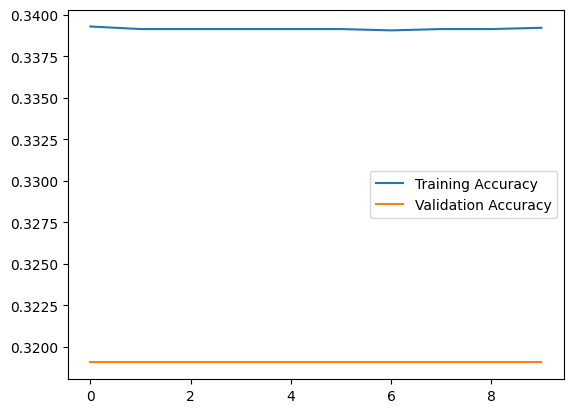

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3104 - loss: 1.5852
Test Accuracy: 31.91%


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


In [ ]:
emotion_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear'
}


In [ ]:
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=X_train.shape[1], padding='post')

    pred = model.predict(padded)
    pred_index = np.argmax(pred)

    pred_label = emotion_mapping.get(pred_index, "Unknown")

    return pred_label



In [ ]:
while True:
    input_text = input("Enter a sentence (or type 'quit' to exit): ")
    if input_text.lower() == 'quit':
        break
    predicted_emotion = predict_emotion(input_text)
    print(f"Predicted Emotion: {predicted_emotion}\n")


Enter a sentence (or type 'quit' to exit): i am so tired
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Emotion: joy

Enter a sentence (or type 'quit' to exit): this is not joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Emotion: joy

Enter a sentence (or type 'quit' to exit): okay very bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Emotion: joy

Enter a sentence (or type 'quit' to exit): quit


In [ ]:
pip install pandas scikit-learn


In [ ]:
# 1. Define vocab_size
vocab_size = len(tokenizer.word_index) + 1

# 2. Build your model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes: sadness, joy, love, anger, fear

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop])



Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-24-0a2bba6dc2b2>", line 5, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 3 2 0 1 1 0 5 1 0 3 1 0 3 0 1 0 0 0 1 0 4 2 4 4 0 1 4 0 4 2 1 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_151557]

In [ ]:
# app.py (part 1): Train & save model
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("twitter.csv")
df = df[['tweet', 'emotion']].dropna()

# Train model
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])
model.fit(df['tweet'], df['emotion'])

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)



UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 44120-44121: invalid continuation byte